In [8]:
import pypsa
import numpy as np

# Create a new network
network = pypsa.Network()

coord = (
    (1,2),
    (3,0),
    (3,2),
    (1,0),
    (0,1))

# Add buses (nodes)
for i, (x,y) in enumerate(coord, start=1):
    network.add("Bus", f"bus{i}", v_nom=20, x=x, y=y)

# Add generators
network.add("Generator", "gen1", bus="bus1", p_nom=150, p_set=150)
network.add("Generator", "gen2", bus="bus2", p_nom=150, p_set=150)

# Add loads
network.add("Load", "load3", bus="bus3", p_set=100)
network.add("Load", "load4", bus="bus4", p_set=100)
network.add("Load", "load5", bus="bus5", p_set=100)

# Add lines
lines = [
    ("bus1", "bus2"),
    ("bus1", "bus3"),
    ("bus1", "bus5"),
    ("bus2", "bus3"),
    ("bus2", "bus4"),
    ("bus3", "bus4"),
    ("bus4", "bus5")
]

for i, (bus0, bus1) in enumerate(lines):
    network.add("Line", f"line{i+1}", bus0=bus0, bus1=bus1, x=1.0, r=0.1, s_nom=163)

# Set global parameters
network.set_snapshots(range(1))


In [9]:
network.buses

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
bus1,20.0,,1.0,2.0,AC,,1.0,0.0,inf,PQ,,
bus2,20.0,,3.0,0.0,AC,,1.0,0.0,inf,PQ,,
bus3,20.0,,3.0,2.0,AC,,1.0,0.0,inf,PQ,,
bus4,20.0,,1.0,0.0,AC,,1.0,0.0,inf,PQ,,
bus5,20.0,,0.0,1.0,AC,,1.0,0.0,inf,PQ,,


/home/lkims/miniconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x7f2fdbb3f9b0>,
 <matplotlib.collections.LineCollection at 0x7f2fdbb68770>)

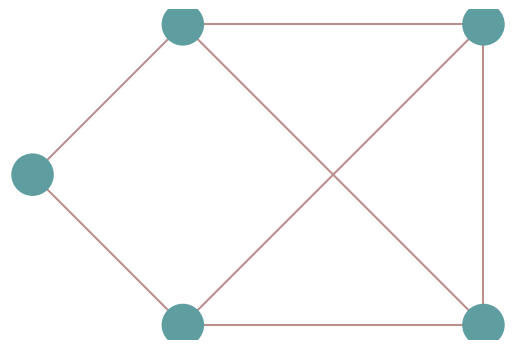

In [10]:
network.plot()

In [11]:
network.lines

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
line1,bus1,bus2,,1.0,0.1,0.0,0.0,163.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line2,bus1,bus3,,1.0,0.1,0.0,0.0,163.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line3,bus1,bus5,,1.0,0.1,0.0,0.0,163.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line4,bus2,bus3,,1.0,0.1,0.0,0.0,163.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line5,bus2,bus4,,1.0,0.1,0.0,0.0,163.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line6,bus3,bus4,,1.0,0.1,0.0,0.0,163.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line7,bus4,bus5,,1.0,0.1,0.0,0.0,163.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Run power flow
network.pf()





INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network <pypsa.components.SubNetwork object at 0x7f2fe3dc6030> for snapshots RangeIndex(start=0, stop=1, step=1, name='snapshot')


{'n_iter': SubNetwork  0
 snapshot     
 0           4,
 'error': SubNetwork             0
 snapshot                
 0           6.085777e-07,
 'converged': SubNetwork     0
 snapshot        
 0           True}

In [13]:
network.lines_t.p0

,line1,line2,line3,line4,line5,line6,line7
snapshot,,,,,,,
0,-2.094355,63.442787,95.685036,62.482316,85.335577,23.714279,6.835106


In [14]:
network.lines_t.p0


,line1,line2,line3,line4,line5,line6,line7
snapshot,,,,,,,
0,-2.094355,63.442787,95.685036,62.482316,85.335577,23.714279,6.835106
